<a href="https://colab.research.google.com/github/ciciliujx/Vital-Food-Costs-Analysis/blob/main/2025_CS_Camp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1. Descriptive Statistics

Imagine you want to summarize some of the most important food cost metrics and trends for economists. Provide descriptive statistics of the dataset any way you see fit. At minimum, include the following:

➢ Calculate cost of living trends such as CPI

➢ Find and show plots of any interesting patterns or trends in food costs

➢ Include summary tables per country, product, etc.

In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download latest version
path = kagglehub.dataset_download("sumangoda/food-prices")

print("Path to dataset files:", path)

100%|██████████| 8.02k/8.02k [00:00<00:00, 9.19MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sumangoda/food-prices/versions/4


In [3]:
data = pd.read_csv(path + "/Food Prices.csv")
data.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High


In [4]:
data.columns = data.columns.str.strip()

This dataset provides an analysis of average monthly prices for **four essential food items**, namely Eggs, Milk, Bread, and Potatoes, in **five different countries**: Australia, Japan, Canada, South Africa, and Sweden. The dataset spans a five-year period, **from 2018 to 2022**, offering a comprehensive overview of how food prices have evolved over time in these nations.

## 1. CPI Calculation
Since we are not given information about the quantitives of the food items that a consumer consumes on average, we adopt an approximate approach, using equal-weight average of price relatives. Then the formula to calculate CPI becomes:

$$
\text{CPI}_t = \left( \frac{1}{n} \sum_{i=1}^{n} \frac{p_{i,t}}{p_{i,0}} \right) \times 100
$$

where
*   $p_{i,t}$: price of item $i$ at time $t$

*   $p_{i,0}$: price of item $i$ in the base period

*   n: number of items



To calculate the CPI for each country and month, we transform the long data frame to a wide one:

In [5]:
wide_data = data.pivot(index=['Country', 'Food Item'], columns=['Year', 'Month'], values='Price in USD')
wide_data.head()

Year                 2018                                                  \
Month                  1     2     3     4     5     6     7     8     9    
Country   Food Item                                                         
Australia Bread      1.47  1.48  1.48  1.48  1.48  1.49  1.49  1.49  1.50   
          Eggs       2.08  2.09  2.10  2.11  2.12  2.13  2.13  2.14  2.15   
          Milk       0.82  0.83  0.83  0.84  0.84  0.85  0.86  0.86  0.87   
          Potatoes   2.18  2.18  2.18  2.18  2.19  2.19  2.19  2.19  2.19   
Canada    Bread      2.18  2.19  2.19  2.19  2.20  2.20  2.21  2.21  2.21   

Year                       ...  2022                                      \
Month                  10  ...    3     4     5     6     7     8     9    
Country   Food Item        ...                                             
Australia Bread      1.50  ...  1.84  1.85  1.87  1.88  1.89  1.91  1.92   
          Eggs       2.16  ...  3.48  3.54  3.60  3.66  3.72  3.79  3.85   
          Milk       0.87  ...  1.17  1.17  1.17  1.18  1.18  1.18  1.18   
          Potatoes   2.19  ...  2.57  2.59  2.61  2.63  2.66  2.68  2.70   
Canada    Bread      2.22  ...  2.41  2.42  2.43  2.44  2.44  2.45  2.46   

Year                                   
Month                  10    11    12  
Country   Food Item                    
Australia Bread      1.93  1.95  1.96  
          Eggs       3.91  3.97  4.03  
          Milk       1.18  1.19  1.19  
          Potatoes   2.73  2.75  2.77  
Canada    Bread      2.46  2.47  2.48  

[5 rows x 60 columns]

Then calculate the monthly price ratio of each food item, group by country, and take the mean. This gives us the CPI results.

In [6]:
CPI = [(wide_data.iloc[:,i] / wide_data.iloc[:,0]).groupby(level=0).mean()*100 for i in range(wide_data.shape[1])]
CPI = pd.concat(CPI, axis=1)

dates = pd.date_range(start='2018-01-01', end='2022-12-31', freq='MS')
date_str_list = [d.strftime('%Y-%m') for d in list(dates)]

CPI.columns = date_str_list
CPI.head()

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
Country,,,,,,,,,,,,,,,,,,,,,
Australia,100.0,100.595138,100.715331,101.140401,101.375272,101.970411,102.275289,102.395481,102.990619,103.110812,...,138.262649,139.383229,140.673876,142.099334,143.334593,144.745433,145.866012,147.101271,148.696797,149.817376
Canada,100.0,100.366289,100.453095,100.568836,100.906190,100.906190,101.359284,101.359284,101.446090,101.812379,...,110.129312,110.582406,110.783891,111.236986,111.575401,111.979432,112.432527,112.770943,113.088168,113.541263
Japan,100.0,100.186567,100.186567,100.186567,100.559701,100.559701,100.656227,100.842794,100.842794,100.842794,...,109.577586,110.016928,110.552795,111.022455,111.275230,111.714572,112.437007,112.720099,113.159441,113.785351
South Africa,100.0,100.537144,100.537144,101.145013,101.507332,101.682157,101.682157,101.682157,102.364989,102.539814,...,118.032636,118.394955,119.177649,119.714793,120.035306,120.859806,121.034631,122.004819,122.179644,123.149832
Sweden,100.0,100.137363,100.387363,100.524725,101.004083,101.239102,101.489102,101.626465,101.876465,102.243185,...,125.693569,126.740621,127.690016,128.874431,130.150841,131.237599,132.284651,133.331702,134.418461,135.465512


##2. Trends of Food Costs

### CPI by country

To do visualization, we need to convert the wide CPI data frame to a long one.

In [7]:
CPI_long = CPI.reset_index().melt(id_vars='Country', var_name='Month', value_name='CPI')
CPI_long.head()

,Country,Month,CPI
0,Australia,2018-01,100.0
1,Canada,2018-01,100.0
2,Japan,2018-01,100.0
3,South Africa,2018-01,100.0
4,Sweden,2018-01,100.0


In [8]:
CPI_long['Month'] = pd.to_datetime(CPI_long['Month'], format='%Y-%m')

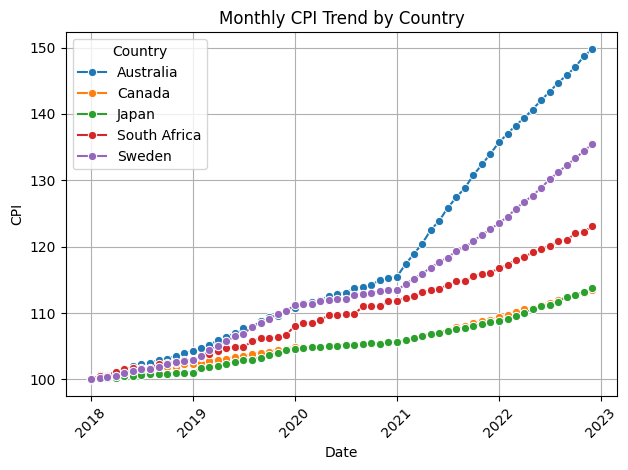

In [9]:
# Plot CPI over time by country
sns.lineplot(data=CPI_long, x='Month', y='CPI', hue='Country', marker='o')

plt.title('Monthly CPI Trend by Country')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot above:

1.   Australia, Sweden, and South Africa showed similar, steady inflation trends from 2018 to 2020. Starting in 2021, Australia’s CPI rose sharply, reaching ~150 by end-2022 (base = Jan 2018), followed by Sweden and then South Africa.

2.   Canada and Japan experienced slower, steady CPI growth from 2018 to 2022, with nearly identical inflation patterns throughout the period.

### Food Cost by Country
Next, we want to see how the price of individual food item changes over time across countries.

In [10]:
data_selected = data.loc[:,['Country', 'Food Item', 'Year', 'Month', 'Price in USD']]
data_selected['Month'] = pd.to_datetime(data_selected[['Year', 'Month']].assign(DAY=1))
data_selected.head()

,Country,Food Item,Year,Month,Price in USD
0,Australia,Bread,2018,2018-01-01,1.47
1,Australia,Bread,2018,2018-02-01,1.48
2,Australia,Bread,2018,2018-03-01,1.48
3,Australia,Bread,2018,2018-04-01,1.48
4,Australia,Bread,2018,2018-05-01,1.48


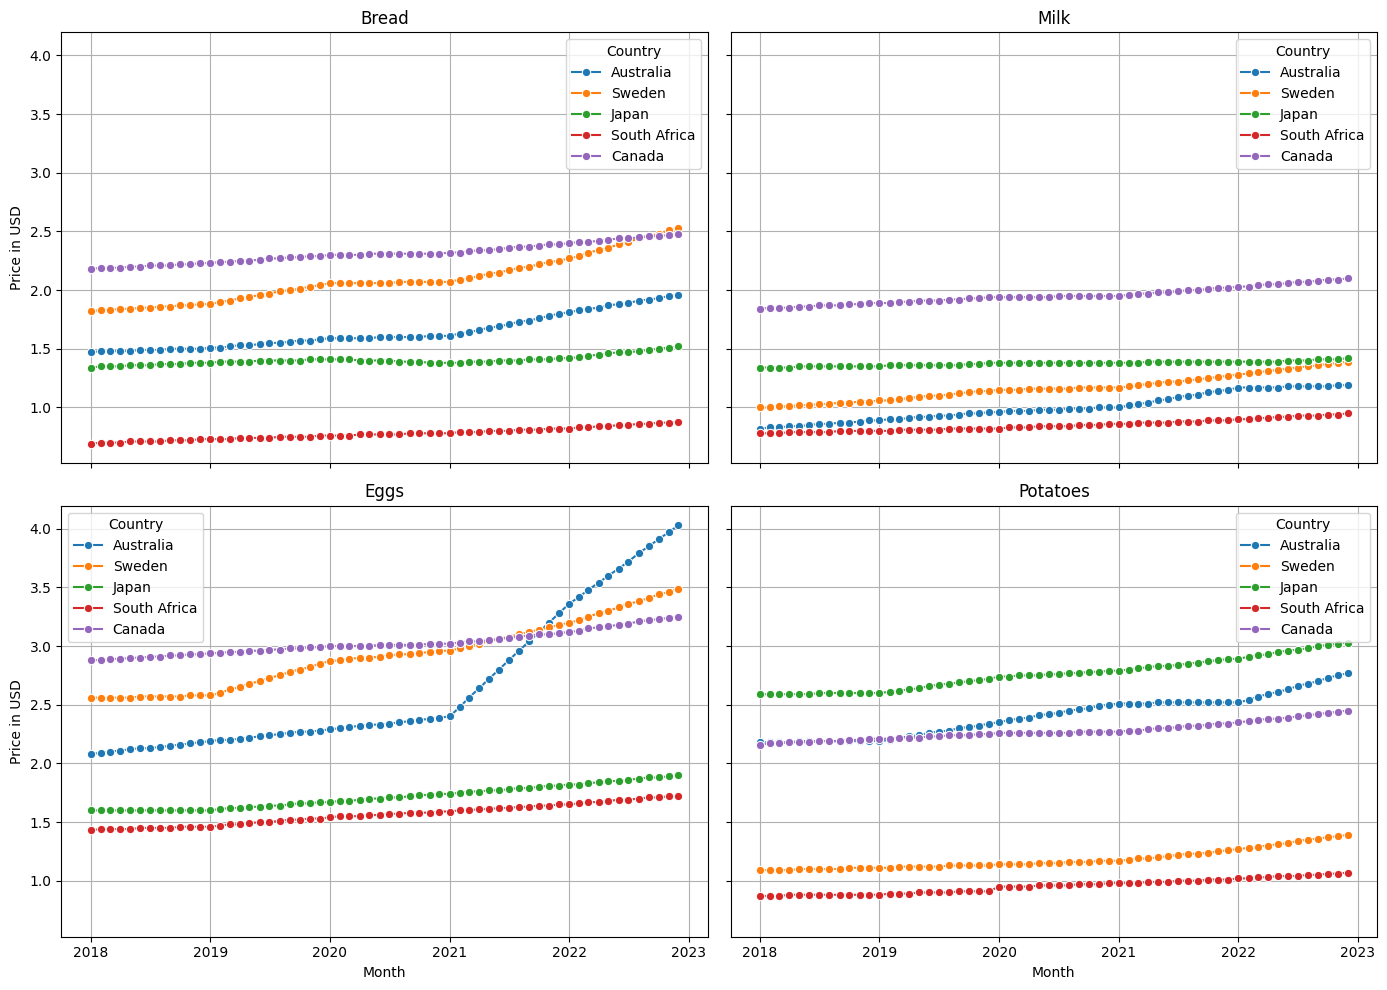

In [11]:
# Plot food price over time by country

food_items = data_selected['Food Item'].unique()

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, food in enumerate(food_items):
    ax = axes[i]
    subset = data_selected[data_selected['Food Item'] == food]
    sns.lineplot(data=subset, x='Month', y='Price in USD', hue='Country', marker='o', ax=ax)
    ax.set_title(food)
    ax.set_xlabel('Month')
    ax.set_ylabel('Price in USD')
    ax.legend(title='Country')
    ax.grid(True)

plt.tight_layout()
plt.show()

From the plot above:
Bread and milk had the highest average prices in Canada

1.   Bread and milk had the highest average prices in Canada throughout the period. For example, bread prices in Canada were about $1.5 USD higher than in South Africa. However, prices for both items remained relatively stable across countries.

2.   Egg prices in Australia spiked sharply in January 2021. Overall, Japan and South Africa consistently had lower prices than other countries, with a difference of about $1.5 USD throughout the period.

3.   Potato prices in Japan, Australia, and Canada rose from \$2.2–2.6 in 2018 to \$2.5–3.0 in 2022, staying higher than in Sweden and South Africa, where prices were about $1.5 lower on average.


## 3. Summary Tables

**Summary Table per Country**

We examine the food costs in Canada as an example. Similar analyses can be applied to other countries.

In [15]:
summary = data[data['Country'] == 'Canada'].groupby('Food Item')['Price in USD'].agg(
    Obs='count',
    Mean_Price='mean',
    Min_Price='min',
    Max_Price='max',
    Median='median',
    Std_Dev='std'
)

summary['Range'] = summary['Max_Price'] - summary['Min_Price']
summary['Coeff_of_Var (%)'] = (summary['Std_Dev'] / summary['Mean_Price']) * 100

summary = summary.round(2)
print(summary)

           Obs  Mean_Price  Min_Price  Max_Price  Median  Std_Dev  Range  \
Food Item                                                                  
Bread       60        2.31       2.18       2.48    2.31     0.08   0.30   
Eggs        60        3.03       2.88       3.25    3.01     0.10   0.37   
Milk        60        1.95       1.84       2.10    1.94     0.07   0.26   
Potatoes    60        2.28       2.16       2.45    2.26     0.08   0.29   

           Coeff_of_Var (%)  
Food Item                    
Bread                  3.59  
Eggs                   3.32  
Milk                   3.61  
Potatoes               3.33  


In [24]:
data.loc[data['Country'] == 'Canada', ['Food Item', 'Unit of Measurement']].drop_duplicates()

,Food Item,Unit of Measurement
960,Bread,Loaf
1020,Milk,1 Kg
1080,Eggs,Carton of 12
1140,Potatoes,1 Kg


From the table above, we can see that:

1. Eggs are the most expensive on average (\$3.03 per carton of 12), and milk is the least expensive (\$1.95 per kg).

2. All items have very low price volatility, with coefficients of variation between 3.3%–3.6%, indicating stable prices over time.

*   Milk has the highest CV (3.61%), suggesting it fluctuates
slightly more than others, but still very stable.

*   Eggs and Potatoes are slightly more stable than Bread, as indicated by their lower coefficients of variation.

**Summary Table per Food Item**

We examine the food costs of bread as an example. Similar analyses can be applied to other food items.

In [25]:
summary_bread = data[data['Food Item'] == 'Eggs'].groupby('Country')['Price in USD'].agg(
    Obs='count',
    Mean_Price='mean',
    Min_Price='min',
    Max_Price='max',
    Median='median',
    Std_Dev='std'
)

summary_bread['Range'] = summary_bread['Max_Price'] - summary_bread['Min_Price']
summary_bread['Coeff_of_Var (%)'] = (summary_bread['Std_Dev'] / summary_bread['Mean_Price']) * 100

summary_bread = summary_bread.round(2)
print(summary_bread)

              Obs  Mean_Price  Min_Price  Max_Price  Median  Std_Dev  Range  \
Country                                                                       
Australia      60        2.65       2.08       4.03    2.34     0.60   1.95   
Canada         60        3.03       2.88       3.25    3.01     0.10   0.37   
Japan          60        1.72       1.60       1.90    1.70     0.10   0.30   
South Africa   60        1.56       1.43       1.72    1.56     0.09   0.29   
Sweden         60        2.92       2.56       3.49    2.92     0.28   0.93   

              Coeff_of_Var (%)  
Country                         
Australia                22.78  
Canada                    3.32  
Japan                     5.63  
South Africa              5.64  
Sweden                    9.63  


From the table above, we see that:

1.  Among the five countries, Canada has the highest average food price (\$3.03), while South Africa has the lowest (\$1.56). These cross-country differences in price levels may reflect differences in income levels, production costs, or food market structures.
2. Bread prices in Australia show the highest volatility, with a coefficient of variation of 22.78%, indicating large month-to-month fluctuations.
3.  Canada has the most stable prices, with the lowest CV of 3.32% and a narrow price range.
4.  Japan and South Africa both exhibit low volatility (~5.6%), suggesting relatively stable food markets.
5. Sweden falls in the middle, with moderate variability.

